# Student Dataset

In [2]:
#imports

import hashlib
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import random


In [3]:
# constants
username = "shubham.goel"
num_of_students = 10000
seed = int ( hashlib.sha256(username.encode()).hexdigest(),16)%(2**32)
print(seed)

3029262140


# Q1.0 Dataset Generation [6 marks]

In [5]:
# StudentDataset class

class STUDENT_DATASET:
    def __init__(self , num_students : int , seed : int):
        ''' Generates the full dataset during initialization using the specified number of students and seed.'''
        self.num_students = num_students
        self.rng = np.random.default_rng(seed)
        self.df = self.assemble_dataframes()
        

    def get_full_dataframe(self):
        """returns the pandas dataframe for the full dataset"""
        return self.df
        

    def generate_gender(self):
        """generates the genders acc to the given prob distribution"""
        genders = ["Male" , "Female" ,"Other"]
        probs =  [0.65 ,0.33,0.02]
        return self.rng.choice(genders , size =self.num_students ,p =  probs).tolist()
        

    def generate_major(self):
        """generates the Majors acc to the given prob distribution"""
        majors= ["B.Tech","MS","PHD"]
        probs =[0.70,0.20,0.10]
        return self.rng.choice(majors , self.num_students , p  = probs)

        

    def generate_program(self , majors:list[str])->list[str]:
        """generates the programs corresponding to majors"""
        programs = []
        p = ["CSE", "ECE", "CHD", "CND"]
        for m in majors:
            if m == "B.Tech":
                probs = [0.40, 0.40, 0.10, 0.10]
            elif m == "MS":
                
                probs = [0.30, 0.30, 0.20, 0.20]
            elif m == "PHD":
                 
                 probs = [0.25, 0.25, 0.25, 0.25]

            programs.append(self.rng.choice(p , p  = probs))
        return programs

    def generate_gpa(self ,majors : list[str])->list[float]:
        """generates gpas according to majors"""
        gpas = []
        for m in majors:
            if m == "B.Tech":
                g = self.rng.normal(7.0,1.0)
            elif m == "PHD":
                g = self.rng.normal(8.0,0.7)

            elif m == "MS":
                g = self.rng.normal(8.3,0.5)

            g = np.clip(g,4.0,10.0)
            gpas.append(round(float(g),2))
        return gpas

    def assemble_dataframes(self):
        genders = self.generate_gender()
        majors = self.generate_major()
        programs = self.generate_program(majors)
        gpas = self.generate_gpa(majors)

        df   = pd.DataFrame({
            "Gender": genders,
            "Major": majors,
            "Program": programs,
            "GPA": gpas
        })
        return df


In [6]:
dataset  = STUDENT_DATASET(num_students=num_of_students,seed=seed)
df = dataset.get_full_dataframe()

print(df.head())
print(df.describe())

   Gender   Major Program   GPA
0    Male      MS     CSE  8.37
1  Female  B.Tech     CHD  6.76
2    Male  B.Tech     ECE  8.86
3    Male  B.Tech     ECE  7.98
4    Male      MS     ECE  8.58
                GPA
count  10000.000000
mean       7.378310
std        1.048042
min        4.000000
25%        6.630000
50%        7.460000
75%        8.180000
max       10.000000


# Q1.1 Dataset Analysis

### (a) Visualizations [15 marks]

In [20]:
class VISUALISATION:
    def __init__(self , df : pd.DataFrame):
      
        self.df = df

    def plot_gender_distribution(self)->None:
        """plots the gender distribution of the student dataset"""
        plt.figure(figsize=(6,4))
        sns.countplot(data=self.df , x="Gender",palette="Set2",legend=False,hue="Gender")
        plt.title("Gender Distribution")
        plt.text(0.95, 0.95, username,
                 ha='right', va='top', transform=plt.gca().transAxes,
                 fontsize=10, color='gray', alpha=0.7)
        plt.show()

    def plot_major_distribution(self)->None:
        """plots the major distribution of the student dataset"""
        plt.figure(figsize=(6,4))
        sns.countplot(data=self.df , x="Major",palette="Set2",legend=False,hue="Major")
        plt.title("Major Distribution")
        plt.text(0.95, 0.95, username,
                 ha='right', va='top', transform=plt.gca().transAxes,
                 fontsize=10, color='gray', alpha=0.7)
        plt.show()

    def plot_program_distribution(self)->None:
        """plots the program distribution of the student dataset"""
        plt.figure(figsize=(6,4))
        sns.countplot(data=self.df , x="Program",palette="Set2",legend=False,hue="Program")
        plt.title("Program Distribution")
        plt.text(0.95, 0.95, username,
                 ha='right', va='top', transform=plt.gca().transAxes,
                 fontsize=10, color='gray', alpha=0.7)
        plt.show()

    def plot_gpa_distribution(self)->None:
        """plots the gpa distribution of the student dataset"""
        plt.figure(figsize=(6,4))
        sns.histplot(data=self.df , x="GPA",bins=10,palette="Set2",legend=False,hue="GPA")
        plt.title("GPA Distribution")
        plt.text(0.95, 0.95, username,
                 ha='right', va='top', transform=plt.gca().transAxes,
                 fontsize=10, color='gray', alpha=0.7)
        plt.show()

    def plot_program_distribution_by_major(self)->None:
        """plots the program distribution by major of the student dataset"""
        plt.figure(figsize=(6,4))
        sns.countplot(data=self.df , x="Program",palette="Set2",legend=True,hue="Major")
        plt.title("Program Distribution by major")
        # Add legend
        plt.legend(title="Major", loc="upper right")
        plt.text(0.95, 0.95, username,
                 ha='left', va='top', transform=plt.gca().transAxes,
                 fontsize=10, color='gray', alpha=0.7)
        plt.show()
    
    def plot_gpa_by_major(self) -> None:
        """plots the gpa distribution by major of the student dataset"""
        plt.figure(figsize=(8, 5))
        sns.boxplot(data=self.df, x="Major", y="GPA", palette="Set2",legend=False ,  hue="Major")
        plt.title("GPA by Major")
        plt.text(0.95, 0.95, username,
                 ha='right', va='top', transform=plt.gca().transAxes,
                 fontsize=10, color='gray', alpha=0.7)
        plt.show()

    def plot_gpa_by_program(self) -> None:
        """plots the gpa distribution by Program of the student dataset"""
        plt.figure(figsize=(8, 5))
        sns.boxplot(data=self.df, x="Program", y="GPA", palette="Set2",legend=False ,  hue="Program")
        plt.title("GPA by Program")
        plt.text(0.95, 0.95, username,
                 ha='right', va='top', transform=plt.gca().transAxes,
                 fontsize=10, color='gray', alpha=0.7)
        plt.show()

    def plot_gpa_by_program_and_major(self) -> None:
        """plots the gpa distribution by Program and Major of the student dataset"""
        plt.figure(figsize=(8, 5))
        sns.boxplot(data=self.df, x="Program", y="GPA", palette="Set2",legend=True,  hue="Major")
        plt.title("GPA by Program")
        plt.legend(title="Major", loc="upper right")
        plt.text(0.95, 0.95, username,
                 ha='right', va='top', transform=plt.gca().transAxes,
                 fontsize=10, color='gray', alpha=0.7)
        plt.show()

    def plot_sampled_dataset(self) -> None:
        """plots gender, major, program and GPA of 100 randomly sampled students"""
        sample = self.df.sample(100, random_state=seed)
        plt.figure(figsize=(10, 6))
        sns.scatterplot(data=sample, x="Program", y="GPA", hue="Gender", style="Major", s=80)
        plt.title("Sample of 100 Students (Gender, Major, Program, GPA)")
        plt.text(0.95, 0.95, username,
                 ha='right', va='top', transform=plt.gca().transAxes,
                 fontsize=10, color='gray', alpha=0.7)
        plt.show()

    def plot_entire_dataset_summary(self) -> None:
        """Plots a 4x4 grid of pairwise relationships for GPA, Major, Program, Gender."""
        df = self.df
        fig, axes_grid = plt.subplots(4, 4, figsize=(16, 16))

        col_names = ['GPA', 'Major', 'Program', 'Gender']
        col_labels = ['GPA', 'Major', 'Program', 'Gender']

        color_gender = {'Male': 'blue', 'Female': 'pink', 'Other': 'green'}
        color_major = {'B.Tech': 'orange', 'MS': 'purple', 'PHD': 'cyan'}
        color_program = {'CSE': 'red', 'ECE': 'green', 'CHD': 'blue', 'CND': 'yellow'}

        for row in range(4):
            for col in range(4):
                ax = axes_grid[row, col]
                x_col = col_names[col]
                y_col = col_names[row]

                if row == col:
                    if y_col == 'GPA':
                        ax.hist(df['GPA'], bins=20, color='purple', alpha=0.7, edgecolor='black')
                    elif y_col == 'Gender':
                        counts = df['Gender'].value_counts()
                        ax.bar(counts.index, counts.values, color=[color_gender[g] for g in counts.index])
                    elif y_col == 'Major':
                        counts = df['Major'].value_counts()
                        ax.bar(counts.index, counts.values, color=[color_major[m] for m in counts.index])
                    elif y_col == 'Program':
                        counts = df['Program'].value_counts()
                        ax.bar(counts.index, counts.values, color=[color_program[p] for p in counts.index])
                    ax.set_title(f'{col_labels[row]} Distribution')
                else:
                    if x_col == 'GPA' and y_col != 'GPA':
                        cats = sorted(df[y_col].unique())
                        box_vals = [df[df[y_col] == cat]['GPA'] for cat in cats]
                        box = ax.boxplot(box_vals, patch_artist=True, labels=cats)
                        if y_col == 'Gender':
                            box_colors = [color_gender[cat] for cat in cats]
                        elif y_col == 'Major':
                            box_colors = [color_major[cat] for cat in cats]
                        elif y_col == 'Program':
                            box_colors = [color_program[cat] for cat in cats]
                        for patch, c in zip(box['boxes'], box_colors):
                            patch.set_facecolor(c)
                            patch.set_alpha(0.7)
                        ax.set_title(f'{col_labels[row]} by {col_labels[col]}')
                    elif x_col != 'GPA' and y_col == 'GPA':
                        cats = sorted(df[x_col].unique())
                        if x_col == 'Gender':
                            scatter_colors = [color_gender[cat] for cat in cats]
                        elif x_col == 'Major':
                            scatter_colors = [color_major[cat] for cat in cats]
                        elif x_col == 'Program':
                            scatter_colors = [color_program[cat] for cat in cats]
                        for idx, cat in enumerate(cats):
                            mask = df[x_col] == cat
                            jitter = idx + np.random.normal(0, 0.1, mask.sum())
                            ax.scatter(jitter, df[mask]['GPA'], alpha=0.6, color=scatter_colors[idx], s=20)
                        ax.set_xticks(range(len(cats)))
                        ax.set_xticklabels(cats)
                        ax.set_title(f'{col_labels[row]} by {col_labels[col]}')
                    else:
                        cross_tab = pd.crosstab(df[y_col], df[x_col])
                        ax.imshow(cross_tab.values, cmap='Blues', aspect='auto')
                        for i in range(len(cross_tab.index)):
                            for j in range(len(cross_tab.columns)):
                                ax.text(j, i, str(cross_tab.iloc[i, j]), ha='center', va='center',
                                        color='white' if cross_tab.iloc[i, j] > cross_tab.values.max()/2 else 'black')
                        ax.set_xticks(range(len(cross_tab.columns)))
                        ax.set_xticklabels(cross_tab.columns)
                        ax.set_yticks(range(len(cross_tab.index)))
                        ax.set_yticklabels(cross_tab.index)
                        ax.set_title(f'{col_labels[row]} vs {col_labels[col]}')

        plt.suptitle(f'4x4 Pair Plot: GPA, Major, Program, Gender - {username}', fontsize=20)
        plt.tight_layout(rect=[0, 0, 1, 0.97])
        plt.show()

    def gpa_mean_std(self)->tuple[float , float]:
        """returns the average and std deviation of the gpas"""
        mean_val = self.df['GPA'].mean()
        std_val = self.df['GPA'].std()
        return mean_val, std_val
    
    def count_students_per_program_major_pair(self) -> pd.DataFrame:
        """counts the number of students in each combination of major and program"""
        counts = self.df.groupby(['Program', 'Major']).size().reset_index(name='Count')
        return counts
    

    def visualize_students_per_program_major_pair(self, counts_df: pd.DataFrame) -> None:
        pivot_df = counts_df.pivot(index='Program', columns='Major', values='Count').fillna(0)
        plt.figure(figsize=(8, 6))
        sns.heatmap(pivot_df, annot=True, fmt='g', cmap="YlGnBu")
        plt.text(0.95, 0.95, username,
                 ha='right', va='top', transform=plt.gca().transAxes,
                 fontsize=10, color='gray', alpha=0.7)
        plt.title("Number of Students per Program-Major Pair")
        plt.show()

   



In [21]:
visual = VISUALISATION(df=df)

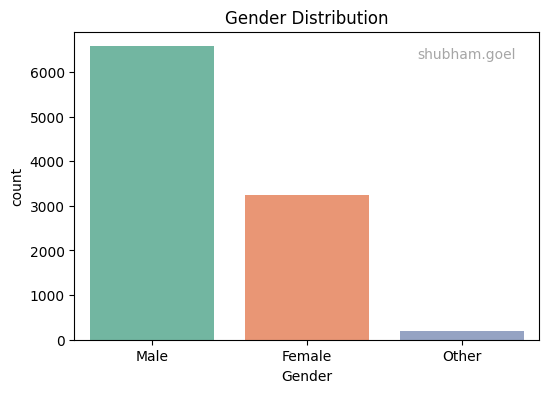

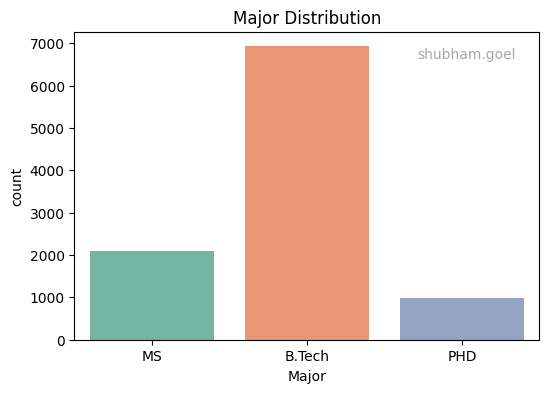

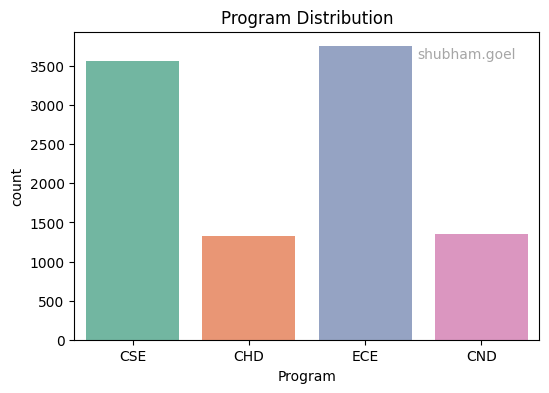

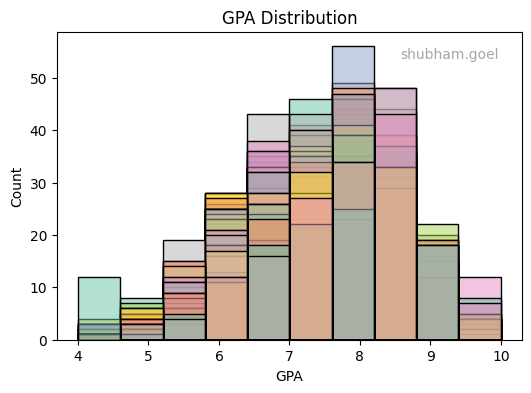

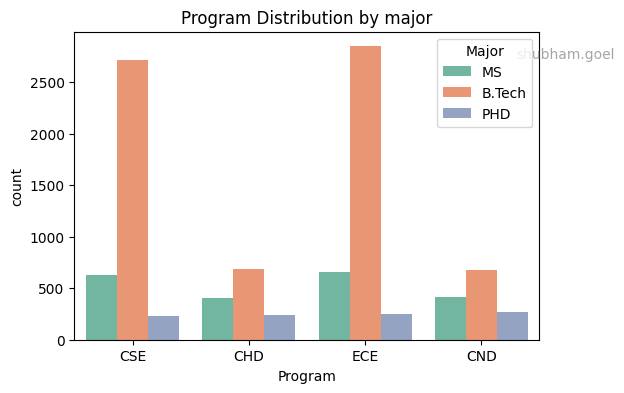

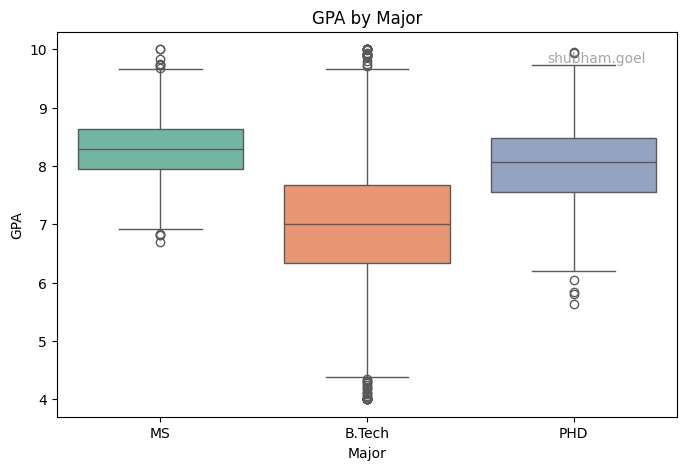

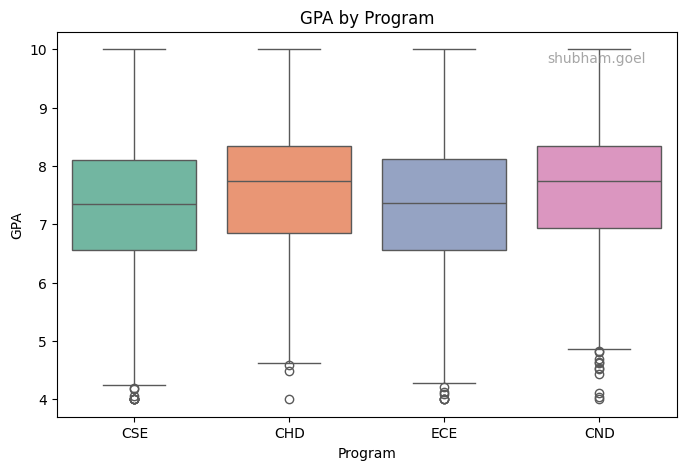

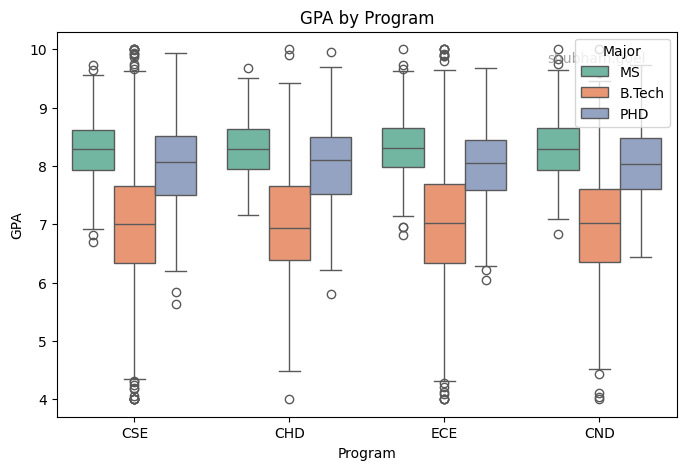

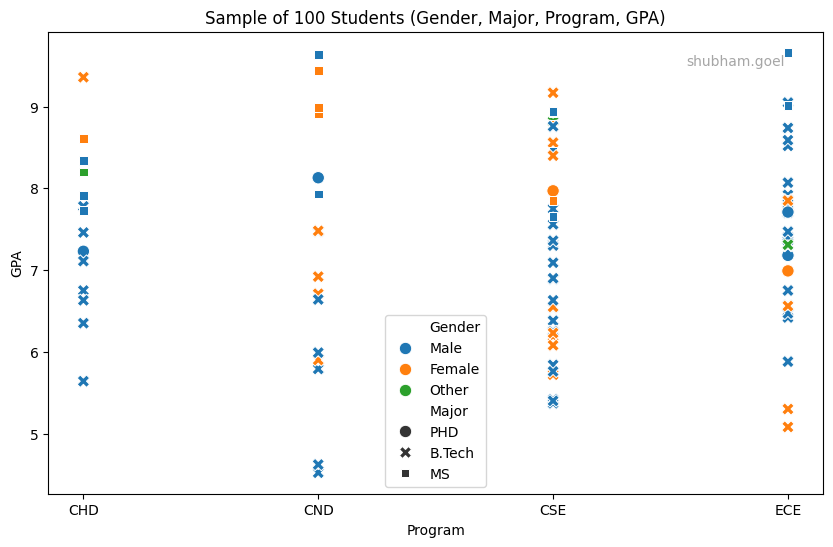

/tmp/ipykernel_11085/1971542979.py:135: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = ax.boxplot(box_vals, patch_artist=True, labels=cats)
/tmp/ipykernel_11085/1971542979.py:135: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = ax.boxplot(box_vals, patch_artist=True, labels=cats)
/tmp/ipykernel_11085/1971542979.py:135: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = ax.boxplot(box_vals, patch_artist=True, labels=cats)


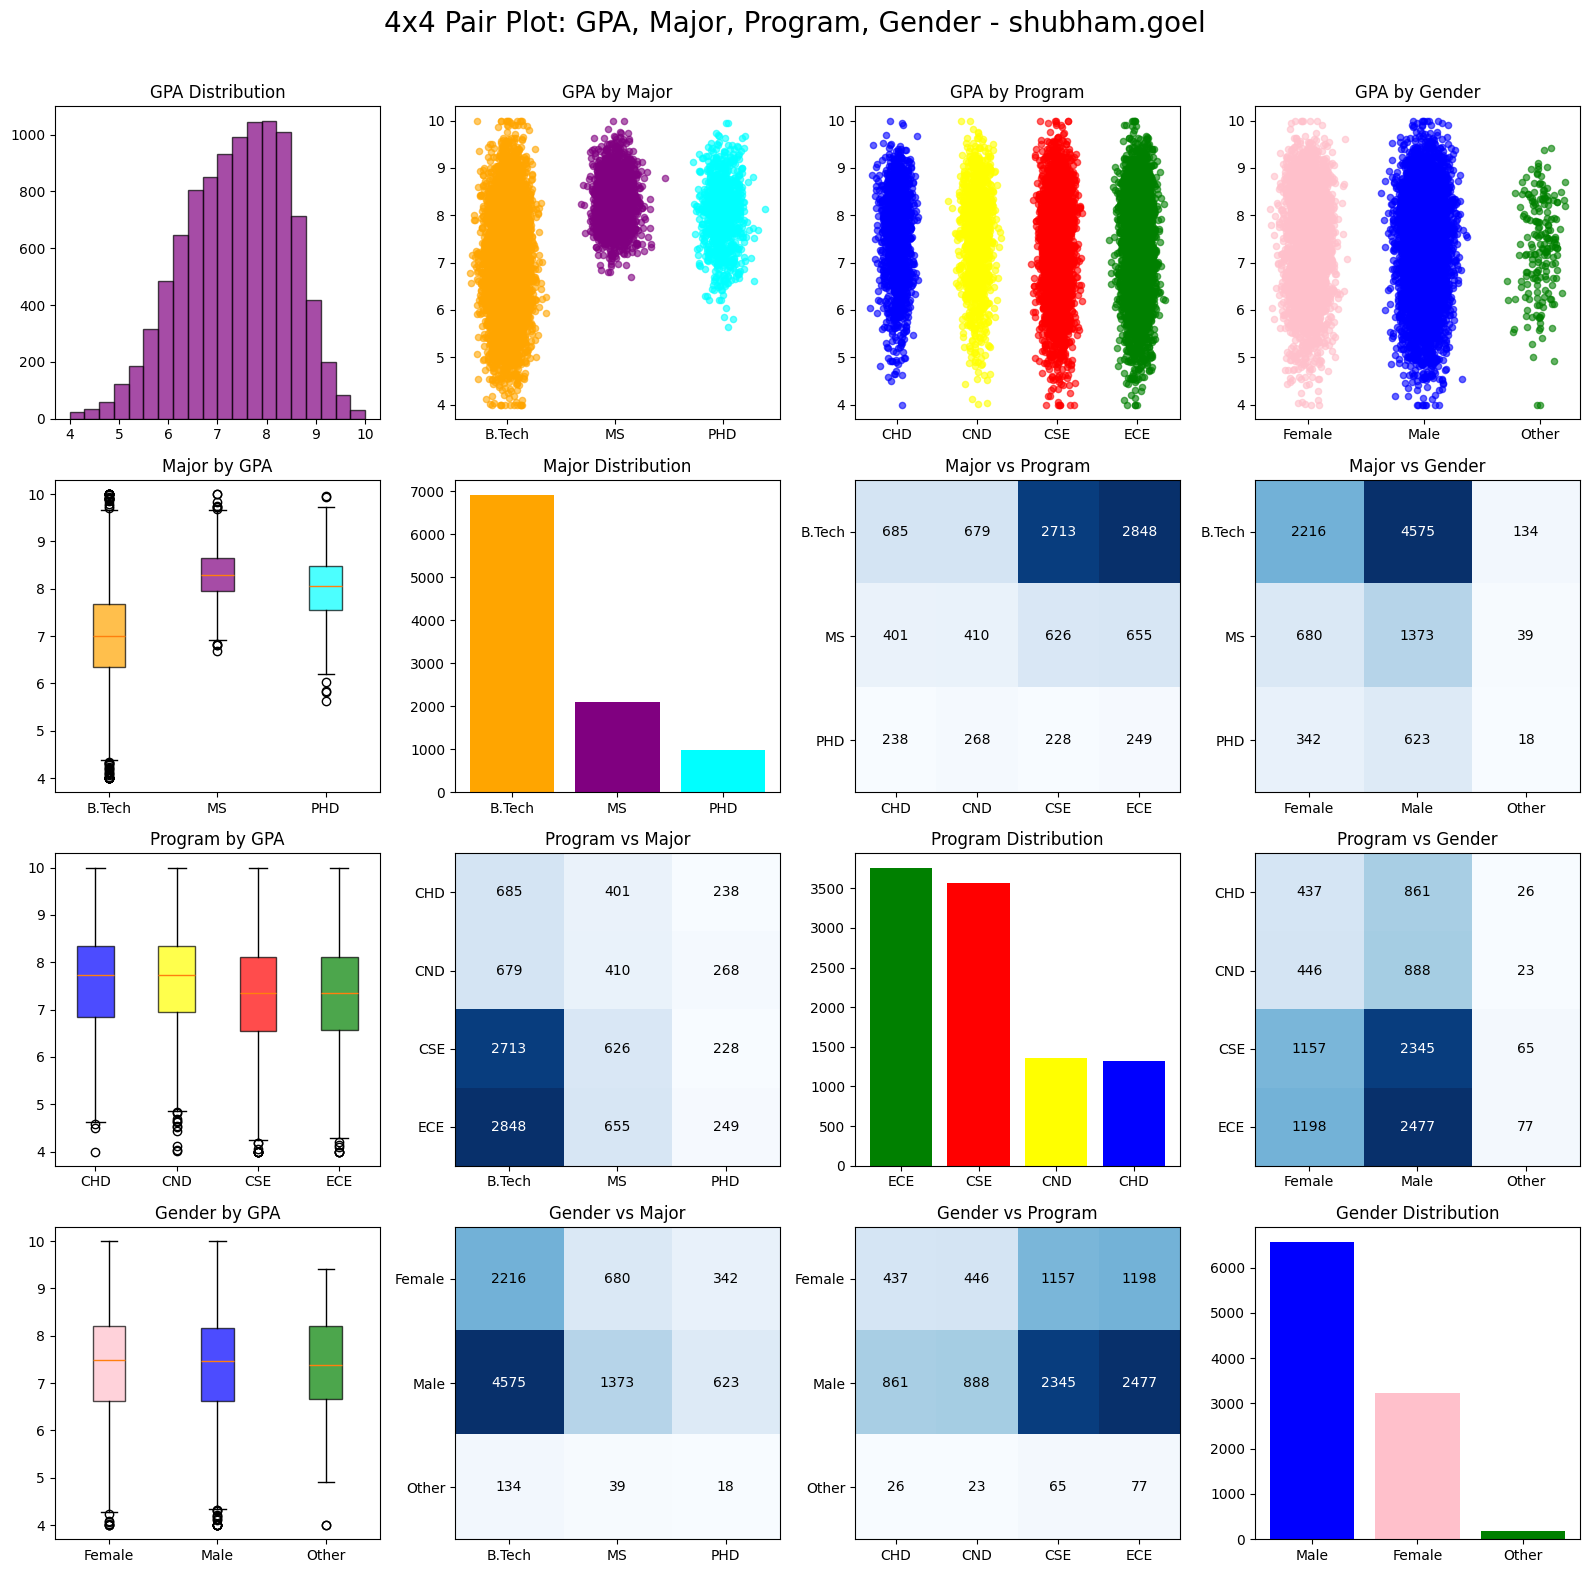

In [66]:

visual.plot_gender_distribution()
visual.plot_major_distribution()
visual.plot_program_distribution()
visual.plot_gpa_distribution()
visual.plot_program_distribution_by_major()
visual.plot_gpa_by_major()
visual.plot_gpa_by_program()
visual.plot_gpa_by_program_and_major()
visual.plot_sampled_dataset()
visual.plot_entire_dataset_summary()

### (b) GPA Summary Statistics [1 mark]
Define a method to compute the mean and standard deviation of GPA:
Report the results and briefly comment on any observations.

In [19]:
mean_gpa , std_gpa = visual.gpa_mean_std()
print(f"The mean and std deviation of gpas are {mean_gpa:.3f} abd {std_gpa:.3f} respectively")


The mean and std deviation of gpas are 7.378 abd 1.048 respectively


* The average GPA is reasonably high (7.3/10), suggesting students generally perform well.

* The relatively low standard deviation (≈1.06) means GPAs are not widely spread; most students’ GPAs are fairly close to the mean.

### (c) Program-Major Combinations [2 marks]
Define a method to count the number of students for each unique (program, major) pairs.
Also write a method to visualize it with a heatmap.

In [10]:

program_major_count_df = visual.count_students_per_program_major_pair()
program_major_count_df.head(12)

,Program,Major,Count
0,CHD,B.Tech,685
1,CHD,MS,401
2,CHD,PHD,238
3,CND,B.Tech,679
4,CND,MS,410
5,CND,PHD,268
6,CSE,B.Tech,2713
7,CSE,MS,626
8,CSE,PHD,228
9,ECE,B.Tech,2848


##### Observations:

* CSE and ECE dominate in terms of student strength:

* CSE B.Tech = 2713, ECE B.Tech = 2848 (very high compared to CHD/CND).

* MS and PhD enrollments are much smaller than B.Tech across all programs (as expected in most institutes).

* For higher studies (MS, PhD), ECE and CSE again have higher counts compared to CHD and CND.

* Ratio-wise, for each program:

* B.Tech is the largest share.

* MS and PhD are smaller, but still significant in research-oriented programs (CSE, ECE).

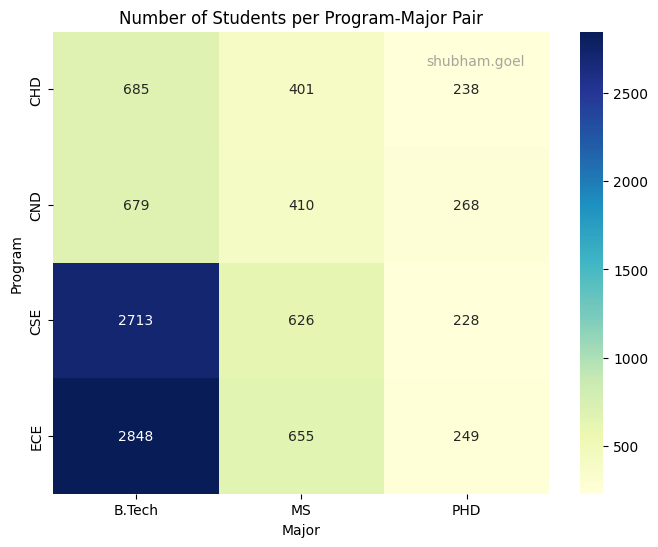

In [11]:
visual.visualize_students_per_program_major_pair(program_major_count_df)

# Q1.2 Simple vs Stratified Sampling [5 marks]

In [63]:

class SAMPLING:
    def __init__(self , df: pd.DataFrame):
        self.df = df

    
    def get_gpa_mean_std_simple(self, n: int = 500, repeats: int = 50) -> tuple[float, float]:
        """returns the mean and std of gpa through random sampl"""
        means = []
        for _ in range(repeats):
            sample = self.df.sample(n=n, replace=False)   # simple random sampling
            means.append(sample["GPA"].mean())
        return np.mean(means), np.std(means)

    def get_gpa_mean_std_stratified(self, n: int = 500, repeats: int = 50) -> tuple[float, float]:
        """returns the mean and std of gpa through stratified sampling"""
        means = []
        majors = self.df["Major"].value_counts(normalize=True)  # proportion of each major
        for _ in range(repeats):
            stratified_samples = []
            for major, prop in majors.items():
                strat_size = int(n * prop)   # proportional allocation
                strat_sample = self.df[self.df["Major"] == major].sample(n=strat_size, replace=False)
                stratified_samples.append(strat_sample)
            sample = pd.concat(stratified_samples)
            means.append(sample["GPA"].mean())
        return np.mean(means), np.std(means)
    
    def get_gender_balanced_counts(self, n=300, repeats=5) -> list[dict[str, int]]:
        genders = self.df['Gender'].unique()
        per_group = n // len(genders)
        results = []
        for _ in range(repeats):
            counts = {}
            for g in genders:
                sample = self.df[self.df['Gender'] == g].sample(per_group)
                counts[g] = len(sample)
            results.append(counts)
        return results
    
    def sample_gender_uniform_random(self, n=300, repeats=5) -> list[dict[str, int]]:
        """samples students based on gender using sampling strategy A"""
        genders = self.df['Gender'].unique()
        results = []
        for _ in range(repeats):
            chosen = np.random.choice(genders, size=n, replace=True)  # pick genders uniformly
            counts = {g: 0 for g in genders}
            for g in chosen:
                student = self.df[self.df['Gender'] == g].sample(1)
                counts[g] += 1
            results.append(counts)
        return results
    
    def plot_avg_max_gender_diff_vs_sample_size(self, sample_sizes=[300,600,900,1200,1500], repeats=10) -> None:
        """Plot a histogram for average maximum relative difference in gender counts v/s
            the number of students sampled across 10 repeats."""
        avg_diffs = []
        genders = self.df['Gender'].unique()

        for n in sample_sizes:
            max_diffs = []
            for _ in range(repeats):
                counts = self.sample_gender_uniform_random(n, 1)[0]

                # compute relative differences between gender counts
                diffs = [abs(counts[g1] - counts[g2]) / n
                        for g1 in genders for g2 in genders if g1 != g2]
                max_diffs.append(max(diffs))
            avg_diffs.append(np.mean(max_diffs))

        # histogram-style bar plot
        plt.bar([str(n) for n in sample_sizes], avg_diffs, width=0.6)
        plt.text(0.95, 0.95, username,
                 ha='right', va='top', transform=plt.gca().transAxes,
                 fontsize=10, color='gray', alpha=0.7)
        plt.xlabel("Sample Size")
        plt.ylabel("Avg Max Relative Gender Difference")
        plt.title("Sample Size vs Gender Difference (Histogram)")
        plt.show()

    def sample_gpa_uniform(self, n=100, bins=10) -> pd.DataFrame:
        """selects 100 students such that there gpa are uniformly distributed accross bins"""
        self.df["gpa_bin"] = pd.cut(self.df["GPA"], bins=bins)
        sampled_list = []

        for _ in range(n):
            # Pick a bin uniformly at random
            chosen_bin = np.random.choice(self.df["gpa_bin"].unique())
            bin_students = self.df[self.df["gpa_bin"] == chosen_bin]
            
            # Sample 1 student from that bin (with replacement to avoid empty bins issue)
            sampled_student = bin_students.sample(1, replace=True)
            sampled_list.append(sampled_student)
        
        return pd.concat(sampled_list).reset_index(drop=True)

           
    def plot_gpa_histogram_comparison(self, n=1000, bins=10):
        """histogram comparison of sampled dataset vs entire dataset"""
        # Original GPA distribution
        plt.hist(self.df["GPA"], bins=bins, alpha=0.5, label="Original", density=True)

        # Sampled GPA distribution using Strategy A (your uniform bin sampling)
        sampled_df = self.sample_gpa_uniform(n=n, bins=bins)
        plt.hist(sampled_df["GPA"], bins=bins, alpha=0.5, label="Sampled (Uniform)", density=True)
        plt.text(0.95, 0.95, username,
                 ha='right', va='top', transform=plt.gca().transAxes,
                 fontsize=10, color='gray', alpha=0.7)
        plt.xlabel("GPA")
        plt.ylabel("Density")
        plt.title("Original vs Sampled GPA Distribution")
        plt.legend()
        plt.show()

    def sample_program_major_balanced(self, n: int = 60) -> pd.DataFrame:
        groups = self.df.groupby(["Program", "Major"])
        # print(groups)
        combos = list(groups.groups.keys())

        sampled = []

        for _ in range(n):
            # Randomly pick a (Program, Major) combo
            combo = random.choice(combos)   # ✅ works with tuples
            group_df = groups.get_group(combo)

            # Randomly pick 1 student from this combo
            sampled.append(group_df.sample(n=1))

        return pd.concat(sampled)

    def plot_program_major_heatmap(self, n: int = 60) -> None:
        # Get balanced sample using Strategy A
        sampled_df = self.sample_program_major_balanced(n=n)

        # Group and count
        counts = sampled_df.groupby(["Program", "Major"]).size().unstack(fill_value=0)
        
        print("Counts per (Program, Major):")
        print(counts)

        # Plot heatmap
        plt.figure(figsize=(8, 6))
        plt.text(0.95, 0.95, username,
                 ha='right', va='top', transform=plt.gca().transAxes,
                 fontsize=10, color='gray', alpha=1.0)
        sns.heatmap(counts, annot=True, fmt="d", cmap="Blues")
        plt.title("Program-Major Balanced Cohort (Sampled)")
        plt.show()







In [64]:
sampling  = SAMPLING(df= df)

### simple sampling

In [35]:
mean_gpa_simple , std_gpa_simple = sampling.get_gpa_mean_std_simple()

print(f"mean: {mean_gpa_simple} , std : {std_gpa_simple}")

mean: 7.3752728 , std : 0.04520993904176385


### stratified sampling

In [36]:
mean_gpa_stratified , std_gpa_stratified = sampling.get_gpa_mean_std_stratified()

print(f"mean: {mean_gpa_stratified} , std : {std_gpa_stratified}")

mean: 7.37548256513026 , std : 0.037337851539822164


###  “Which has lower std deviation? Why?”
 Stratified sampling has lower std deviation, because it ensures proportional representation of each major, reducing sampling bias and variability.

# Q1.3 Gender-Balanced Cohort [5 marks]

* Sample 300 students with exact same representation across genders. Repeat 5 times.
Report gender counts. [1]

In [ ]:
print(sampling.get_gender_balanced_counts())

[{'Male': 100, 'Female': 100, 'Other': 100}, {'Male': 100, 'Female': 100, 'Other': 100}, {'Male': 100, 'Female': 100, 'Other': 100}, {'Male': 100, 'Female': 100, 'Other': 100}, {'Male': 100, 'Female': 100, 'Other': 100}]


In [ ]:
print(sampling.sample_gender_uniform_random())

[{'Male': 115, 'Female': 90, 'Other': 95}, {'Male': 105, 'Female': 94, 'Other': 101}, {'Male': 101, 'Female': 108, 'Other': 91}, {'Male': 82, 'Female': 101, 'Other': 117}, {'Male': 107, 'Female': 105, 'Other': 88}]


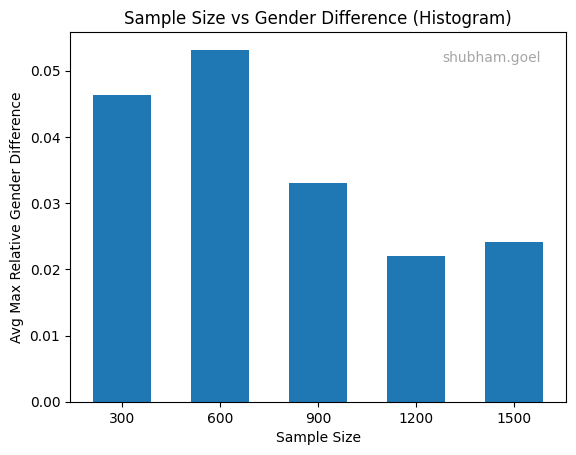

In [65]:

sampling.plot_avg_max_gender_diff_vs_sample_size()

# Q1.4 GPA-Uniform Cohort [3 marks]

In [37]:
sampling.sample_gpa_uniform()

,Gender,Major,Program,GPA,gpa_bin
0,Female,B.Tech,CSE,7.86,"(7.6, 8.2]"
1,Male,B.Tech,ECE,5.87,"(5.8, 6.4]"
2,Female,B.Tech,ECE,8.07,"(7.6, 8.2]"
3,Male,B.Tech,ECE,4.31,"(3.994, 4.6]"
4,Female,MS,ECE,9.07,"(8.8, 9.4]"
...,...,...,...,...,...
95,Female,B.Tech,ECE,5.51,"(5.2, 5.8]"
96,Female,B.Tech,ECE,6.17,"(5.8, 6.4]"
97,Male,B.Tech,CND,5.20,"(4.6, 5.2]"
98,Female,B.Tech,CSE,8.87,"(8.8, 9.4]"


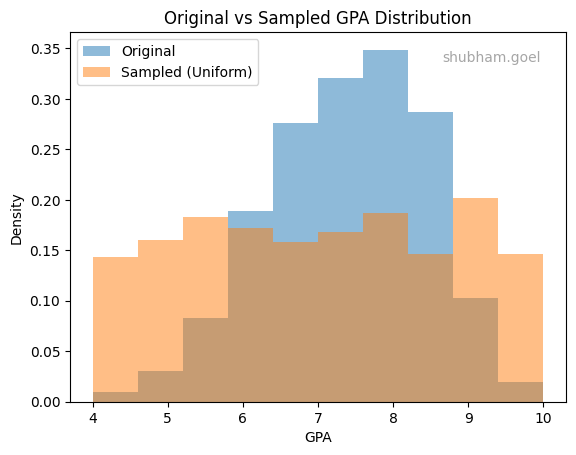

In [58]:
sampling.plot_gpa_histogram_comparison()

### Did you sample with or without replacement? Why? [1]

i did sampling with replacement because it is not neccessary i will be having enough number of students in a gpa bin 

# Q1.5 Program-Major Balanced Cohort [3 marks]

In [48]:
sampling.sample_program_major_balanced()

,Gender,Major,Program,GPA,gpa_bin
6258,Male,PHD,CSE,7.44,"(7.0, 7.6]"
5463,Female,B.Tech,CND,7.90,"(7.6, 8.2]"
1644,Male,MS,ECE,8.51,"(8.2, 8.8]"
4492,Male,B.Tech,ECE,6.04,"(5.8, 6.4]"
8250,Female,PHD,ECE,9.08,"(8.8, 9.4]"
9273,Male,B.Tech,CND,6.33,"(5.8, 6.4]"
5622,Female,MS,CHD,7.40,"(7.0, 7.6]"
5572,Male,MS,CHD,8.20,"(7.6, 8.2]"
6517,Male,MS,CHD,7.97,"(7.6, 8.2]"
3643,Female,B.Tech,ECE,6.32,"(5.8, 6.4]"


Counts per (Program, Major):
Major    B.Tech  MS  PHD
Program                 
CHD           5   4    5
CND           6   3    3
CSE           2   4    8
ECE           5   6    9


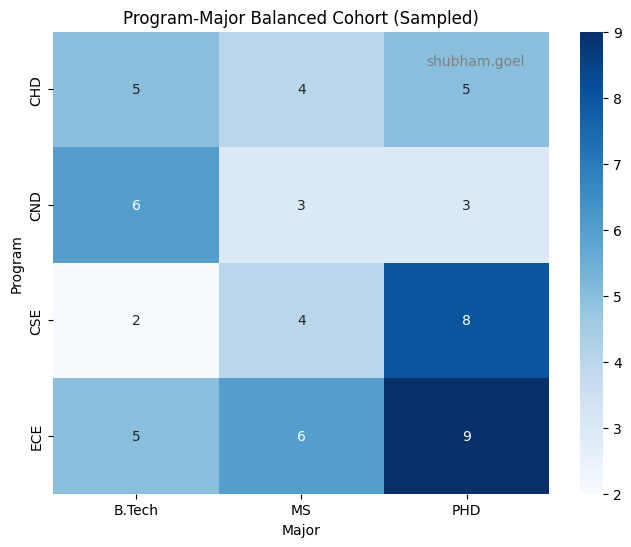

In [59]:
sampling.plot_program_major_heatmap()

Were any groups too small? How did you handle it? [1]

* in a sample of 60 , we always have atleast 5 students are required for each program major pair
so there wont be any issues with sampling from small groups

* but in case of larger sample size like 10000 , we might have some major-program with fewer students

* to handle this we can use sampling with replacement